In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

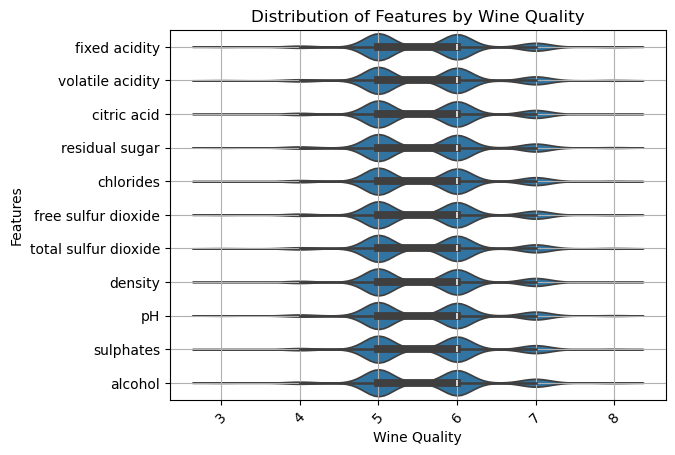

In [197]:
import seaborn as sns
df=pd.read_csv('/Users/delta/ML/wine_quality/winequality-red.csv',delimiter=';')

# Create a violin plot
melted_data=pd.melt(df, id_vars=["quality"])
sns.violinplot(
    x = "quality",  # Place quality on x-axis for comparison
    y =  "variable",  # Use melted data frame for features on y-axis
    data=melted_data  # Melt data for violin plot
)

# Customize the plot (optional)
plt.title('Distribution of Features by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

In [119]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [121]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [122]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [123]:
df['total acidity']=df['fixed acidity'] + df['volatile acidity']
df['density * pH']=df['pH']*df['density']
df['sulphates / chlorides']=df['sulphates']/df['chlorides']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity,density * pH,sulphates / chlorides
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,3.502278,7.368421
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,3.189760,6.938776
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56,3.250220,7.065217
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,11.48,3.153680,7.733333
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,3.502278,7.368421


In [124]:
numerical_features=df.drop(columns=['quality']).columns.tolist()

In [125]:
#Feature Scaling through Standard Scaling where mean is reduced to 0 and unit standard deviation
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[numerical_features]=scaler.fit_transform(df[numerical_features])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity,density * pH,sulphates / chlorides
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.438774,1.331060,-0.316596
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,-0.098301,-0.727877,-0.457225
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,-0.168744,-0.329553,-0.415839
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,1.545360,-0.965580,-0.197155
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.438774,1.331060,-0.316596


/var/folders/9w/0fyqdq9949sbrp6_v4vfw7dw0000gn/T/ipykernel_90203/1216762932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df,palette='viridis')


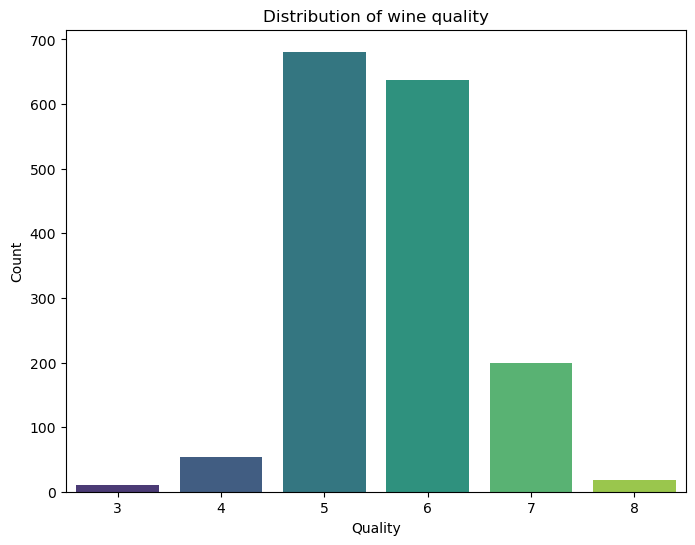

In [127]:
#checking the distribution of wine quality through seaborn sns with countplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='quality',data=df,palette='viridis')
plt.title("Distribution of wine quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

In [180]:
X=df.drop(columns=['quality'])
Y=df['quality']

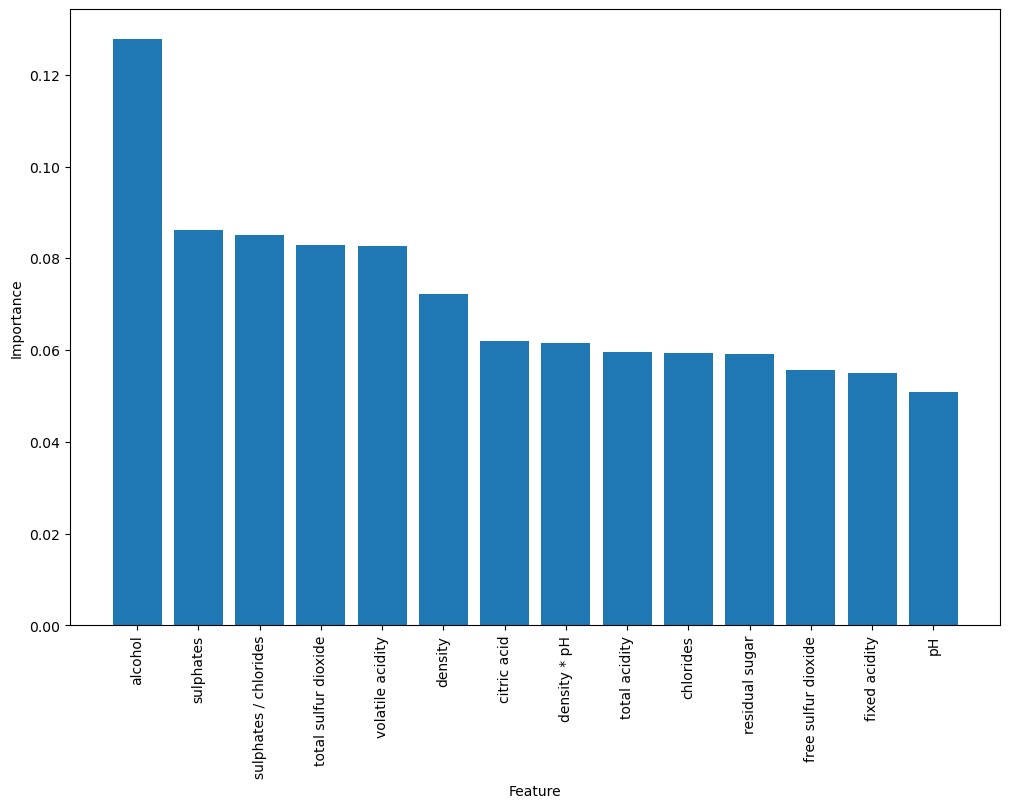

In [181]:
#feature importance using random forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X,Y)

importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

#plot
plt.figure(figsize=(12,8))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]),[numerical_features[i] for i in indices],rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [182]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [183]:
print(X_train.shape,
X_test.shape,
Y_train.shape,
Y_test.shape)

(1119, 14) (480, 14) (1119,) (480,)


In [184]:
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [185]:
Y_pred=model.predict(X_test)

In [186]:
acc_score=accuracy_score(Y_test,Y_pred)
print(acc_score)

0.6770833333333334


In [187]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.11        17
           5       0.74      0.78      0.76       195
           6       0.65      0.71      0.68       200
           7       0.55      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.68       480
   macro avg       0.57      0.36      0.38       480
weighted avg       0.68      0.68      0.66       480



/Users/delta/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/delta/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/delta/Downloads/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [104]:
print(confusion_matrix(Y_test,Y_pred))

[[  0   0   1   0   0   0]
 [  0   1   9   6   1   0]
 [  1   9 129  49   7   0]
 [  0  11  45 115  26   3]
 [  0   1   4  20  33   3]
 [  0   0   0   4   1   1]]


[Text(0.6340741676170171, 0.9736842105263158, 'alcohol <= 0.096\ngini = 0.642\nsamples = 1279\nvalue = [9.0, 43.0, 551.0, 506.0, 157.0, 13.0]\nclass = 5'),
 Text(0.46482128247719157, 0.9210526315789473, 'total sulfur dioxide <= 1.582\ngini = 0.541\nsamples = 786\nvalue = [6.0, 27.0, 465.0, 256.0, 30.0, 2.0]\nclass = 5'),
 Text(0.3592339969258231, 0.868421052631579, 'sulphates / chlorides <= 0.261\ngini = 0.568\nsamples = 689\nvalue = [6.0, 26.0, 375.0, 251.0, 29.0, 2.0]\nclass = 5'),
 Text(0.2069646221737406, 0.8157894736842105, 'sulphates <= -0.786\ngini = 0.533\nsamples = 571\nvalue = [6.0, 23.0, 345.0, 180.0, 17.0, 0.0]\nclass = 5'),
 Text(0.04217076556921857, 0.7631578947368421, 'residual sugar <= 1.001\ngini = 0.43\nsamples = 132\nvalue = [2, 14, 97, 18, 1, 0]\nclass = 5'),
 Text(0.015717969059896867, 0.7105263157894737, 'density <= -1.403\ngini = 0.377\nsamples = 120\nvalue = [1, 13, 93, 12, 1, 0]\nclass = 5'),
 Text(0.012544625148750497, 0.6578947368421053, 'gini = 0.0\nsamples 

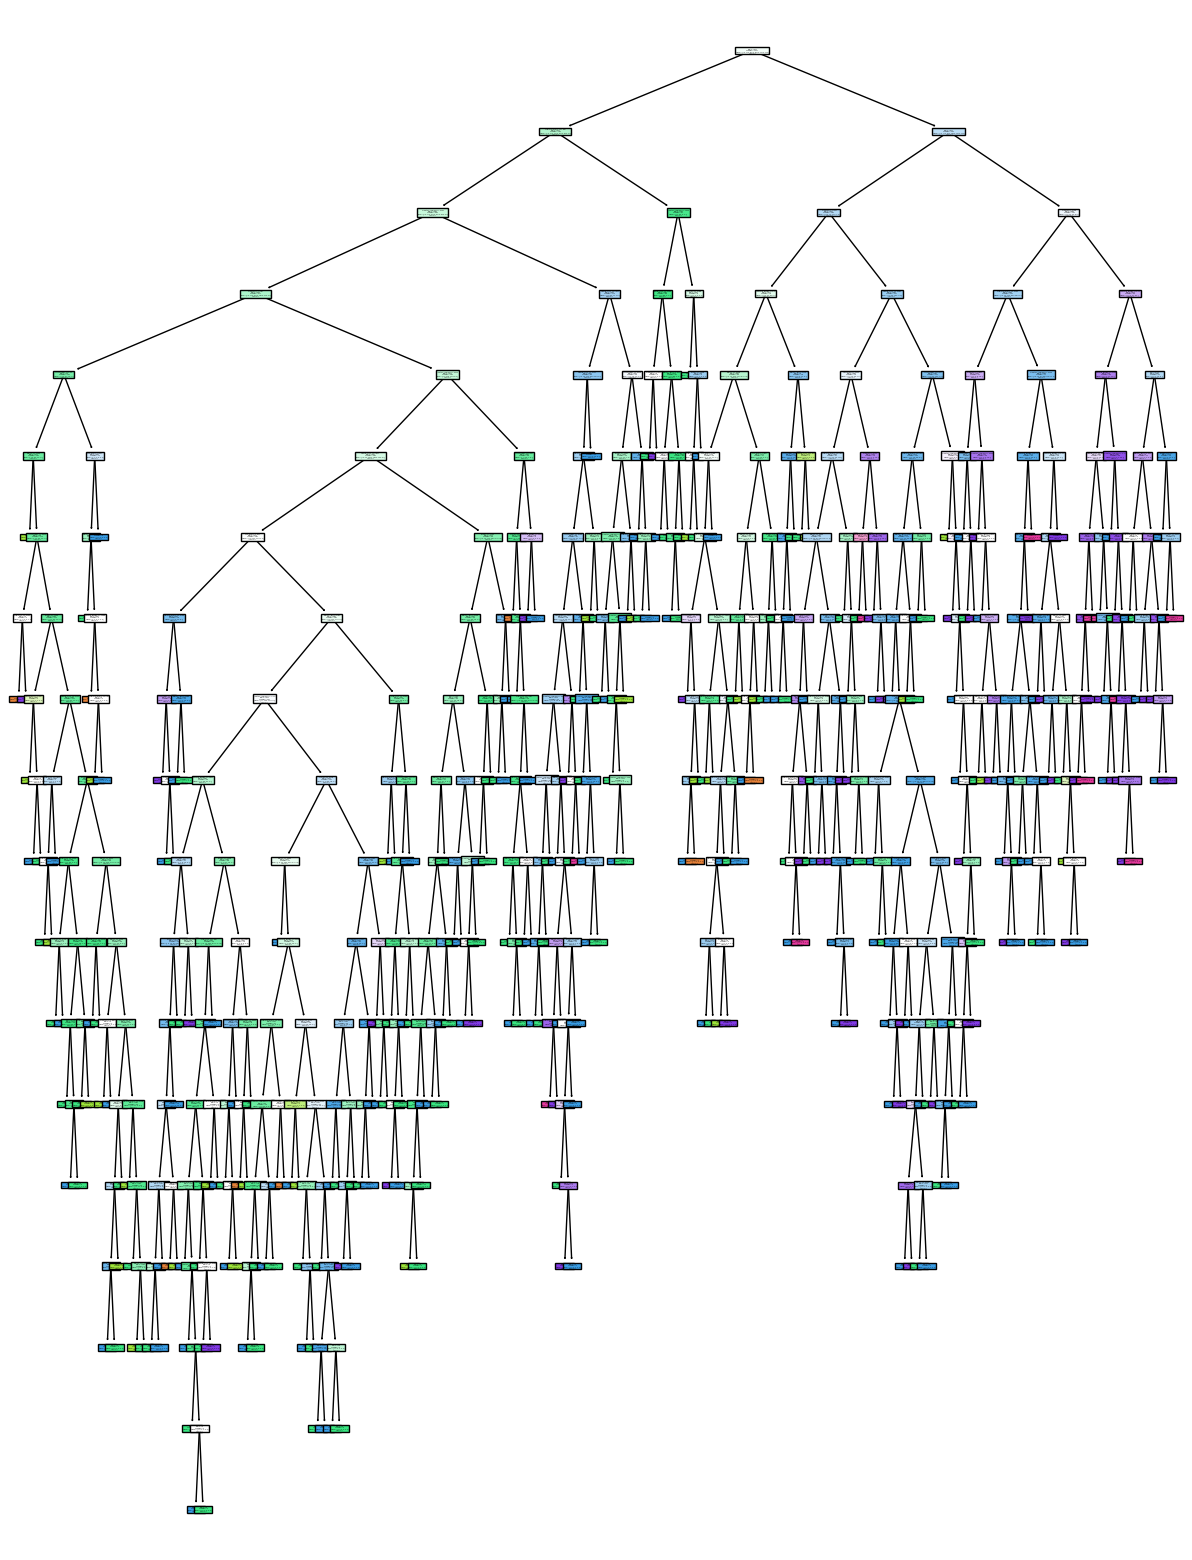

In [169]:
plt.figure(figsize=(15,20))
plot_tree(clf,feature_names=X.columns,class_names=[str(c) for c in sorted(Y.unique())],filled=True)

In [188]:
plt.show()